## Kulturnav - Same as Wikidata  
* [This Notebook](https://github.com/salgo60/open-data-examples/blob/master/Kulturnav%20-%20Entity-sameAsWD.ipynb)
* [API](https://kulturnav.org/info/api)
  * [get all same as](https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*)

In [1]:
import urllib3, json
import traceback
import pandas as pd  
from tqdm.notebook import trange  
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
urlbase = "https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*?start=" 
urlbase = "https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/" 
urlbase = "https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/" 

dftot = pd.DataFrame()
listNewKulturnav =[]
for i in trange(1,1000,20):
    url = urlbase + str(i)
    r = http.request('GET', url)
    if len(r.data) > 10: 
        #print(len(r.data),r.status, url)
        new_item = dict()

        try:
            data = json.loads(r.data)
            dftot = dftot.append(pd.DataFrame(data),sort=False)
            for d in data:
                try:
                    captionsv = d["caption"]["sv"]
                except:
                    captionsv = ""
                try:
                    captionno = d["caption"]["no"]
                except:
                    captionno = ""
                try:
                    sameasList = d["properties"]["entity.sameAs"]
                    for s in sameasList:
                        wdurl = s["value"]
                        if "wikidata.org" in wdurl:
                            if d["uuid"] in "d52e11ab-7f03-4f3e-bdc4-da24ee497c95":
                                print("\t",type(wdurl),"\t", wdurl)
                            wdurl =  wdurl.replace("https://www.wikidata.org/entity/","")
                            break

                except:
                    pass
                #print(d["uuid"],"|",d["entityType"],"|",captionsv,"|",captionno,"|",wdurl)
                new_item['uuid'] = d["uuid"]
                new_item['entityType'] = d["entityType"]
                new_item['captionsv'] = captionsv
                new_item['captionno'] = captionno
                new_item['wdurl'] = wdurl

                listNewKulturnav.append(new_item)
        except Exception:
            traceback.print_exc()
            print("\tError in i=",i) 
        
print (len(listNewKulturnav) ," antal poster")



	 <class 'str'> 	 https://www.wikidata.org/entity/Q20973618

1000  antal poster


In [2]:
kulturnav_df = pd.DataFrame(listNewKulturnav)

In [3]:
#dftot.info()

In [4]:
# 1655 om 10000
kulturnav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
uuid          1000 non-null object
entityType    1000 non-null object
captionsv     1000 non-null object
captionno     1000 non-null object
wdurl         1000 non-null object
dtypes: object(5)
memory usage: 39.2+ KB


In [5]:
kulturnav_df[20:100]

,uuid,entityType,captionsv,captionno,wdurl
20,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
21,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
22,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
23,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
24,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
...,...,...,...,...,...
95,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
96,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
97,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
98,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108


In [6]:
kulturnav_df.duplicated(subset=None, keep='first').sum()

950

In [7]:
kulturnav_df.entityType.value_counts()

Person          720
NavalVessel     220
Organization     40
Place            20
Name: entityType, dtype: int64

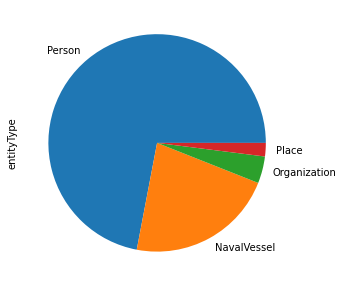

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt   
    !Q       

### Check Wikidata diff

In [9]:
import sys,json
import pandas as pd 
from datetime import datetime

now = datetime.now()
print("Last run: ", now)
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?item  (REPLACE(STR(?item), ".*Q", "Q") AS ?qid) ?itemLabel ?kulturnav {
  ?item wdt:P1254 ?kulturnav
  SERVICE wikibase:label { bd:serviceParam wikibase:language "sv,en". }
} order by ?itemLabel"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDKulturnav = get_sparql_dataframe(endpoint_url, query)
WDKulturnav["Source"] = "Kulturnav" 

Last run:  2020-09-07 02:06:03.704647


In [10]:
WDKulturnav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 5 columns):
item         7158 non-null object
qid          7158 non-null object
itemLabel    7158 non-null object
kulturnav    7158 non-null object
Source       7158 non-null object
dtypes: object(5)
memory usage: 279.7+ KB


In [11]:
kulturnav_df

,uuid,entityType,captionsv,captionno,wdurl
0,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
1,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
2,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
3,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
4,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
...,...,...,...,...,...
995,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
996,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
997,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
998,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084


In [12]:
import numpy as np
from pandas_profiling import ProfileReport

In [13]:
profile = ProfileReport(kulturnav_df, title="Pandas Profiling Report")